<a href="https://colab.research.google.com/github/kimberlyydanij/python_demo/blob/master/python_32_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/python_demo


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

###1. 기본 package 설정

In [3]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
 
## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기
 
## 3.데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화
 
## 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 
 
## 5.분류모델구축 
from sklearn.tree import DecisionTreeClassifier # 결정 트리
 
## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기
 
## 7.최적화
from sklearn.model_selection import cross_validate # 교차타당도
from sklearn.pipeline import make_pipeline # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

### 2. 데이터 가져오기

#### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기

In [4]:
bank_df = pd.read_csv('/content/drive/MyDrive/python_demo/data_crowing/UniversalBank.csv', encoding='cp949')
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- 데이터 구조 탐색

In [5]:
bank_df.shape

(5000, 14)

In [6]:
print(dir(bank_df))

['Age', 'CCAvg', 'CDAccount', 'CreditCard', 'Education', 'Experience', 'Family', 'ID', 'Income', 'Mortgage', 'Online', 'PersonalLoan', 'SecuritiesAccount', 'T', 'ZIPCode', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__',

In [7]:
bank_df.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### 2.2 data와 target의 분리
- 필요한 데이터만 추출
- data:X, target:y로 분리

In [10]:
X = bank_df.drop(['ID','ZIPCode','PersonalLoan'],axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [11]:
y = bank_df['PersonalLoan']
print(np.bincount(y))
print(pd.value_counts(y))

[4520  480]
0    4520
1     480
Name: PersonalLoan, dtype: int64


### 3. 데이터전처리

#### 3.1 data(X)레이블 인코딩
- 문자형 자료를 숫자(범주형)로 인코딩 -> 범주형 변수를 가변수로 처리 : One Hot Encoding
- 숫자형 자료를 표준화
- 단, 결정나무, 랜덤포레스트, 나이브 베이즈 분류 : 원본 그대로 유지
- 가변수 처리 시 문자로 처리를 해야 변수명 구분이 쉬움움

In [12]:
X['Education'] = X['Education'].replace([1,2,3], ['Under', 'Grad', 'Prof'])

In [13]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,Under,0,1,0,0,0
1,45,19,34,3,1.5,Under,0,1,0,0,0
2,39,15,11,1,1.0,Under,0,0,0,0,0
3,35,9,100,1,2.7,Grad,0,0,0,0,0
4,35,8,45,4,1.0,Grad,0,0,0,0,1


In [14]:
X.keys()

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [15]:
# get_dummies() : one hot encoding을 생성해 준다.
# columns에 지정된 feature가 ohe hot encoding으로 생성된다.
# drop_first=True 로 지정하면 맨 처음 범주에 대해서 dummary variable을 할당하지 않는다.
X = pd.get_dummies(X[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']],
       columns=['Education'], drop_first=True)

In [16]:
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Education_Prof,Education_Under
0,25,1,49,4,1.6,0,1,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,1,0,0


#### 3.2 class(target) 레이블 인코딩
- class(y)가 숫자형으로 되어 있기 때문에 변화가 없다.

In [17]:
 y.value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

### 4. 훈련/검증 용 데이터 분할
- test size : 테스트 데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### 5. 모델 구축

In [19]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=1) 
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### 6. 모델검정

#### 6.1 검증용 데이터로 예측
- predict(class로 표시)
- predict_proba(확률값으로 표시)

In [20]:
y_pred = tree.predict(X_test)

In [21]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

### 6.2 오차행렬(confusion_matrix, 정오분류표)로 검정

In [22]:
confusion_matrix(y_test, y_pred)

array([[1347,    9],
       [  19,  125]])

- array  
([[1347,    9],  
 [  19,  125]])
- 실제 0인데 예측에서 맞다고 1347개, 틀리다고 9개
- 실제 1인데 예측에서 맞다고 19개, 틀리다고 125개

In [23]:
 confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        index=['True[0]','True[1]'],
                        columns=['Predict[0]', 'Predict[1]'])
 confmat
                        

,Predict[0],Predict[1]
True[0],1347,9
True[1],19,125


In [24]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.87      0.90       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



#### 6.3 정확도, 민감도 확인
- 클래스가 2개일 경우에만 실행

In [25]:
print('잘못 분류된 샘플 개수 : %d' % (y_test != y_pred).sum())
print('정확도 : %.3f' % accuracy_score(y_test, y_pred))
print('정밀도 : %.3f' % precision_score(y_test, y_pred))
print('재현률 : %.3f' % recall_score(y_test, y_pred))
print('F1 : %.3f' % f1_score(y_test, y_pred))

잘못 분류된 샘플 개수 : 28
정확도 : 0.981
정밀도 : 0.933
재현률 : 0.868
F1 : 0.899


#### 6.4 ROC 곡선 그리기
- decision_function 사용 가능한 모델인 경우 : tree.decision_function(X_test)
- decision_function 사용 안되는 모델인 경우 : tree.predic_proba(X_test)[:,1]

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

In [27]:
#TPR(재현율, 민감도)
#TNR(특이도)
#FPR = 1 - TNR(특이도)
fpr, tpr, thresholds

(array([0.        , 0.00663717, 1.        ]),
 array([0.        , 0.86805556, 1.        ]),
 array([2., 1., 0.]))

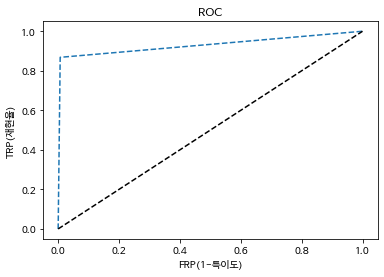

In [28]:
plt.rc('font', family='NanumBarunGothic')
plt.plot(fpr, tpr, '--', label='Decision Tree')
plt.plot([0,1],[0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr], 'r-', ms=10)
plt.xlabel('FRP(1-특이도)')
plt.ylabel('TRP(재현율)')
plt.title('ROC')
plt.show()

### 7. 최적화

#### 7.1 교차검정
- 최적화를 위해서 교차검정 방법을 사용

In [34]:
#cross_validate와 cross_val_score
scores = cross_validate(estimator=tree, X=X_train, y=y_train, scoring=['accuracy'], cv=10, return_train_score=False)
print('CV 정확도 점수 : %s' % scores['test_accuracy'])
print('CV 정확도 : %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))

CV 정확도 점수 : [0.99428571 0.98285714 0.98       0.98285714 0.95428571 0.97714286
 0.99142857 0.98571429 0.96571429 0.98571429]
CV 정확도 : 0.980 +/- 0.011


#### 7.2  파이프라인 만들기
- 파이프라인을 이용하여 최적화 만들기
- 기본 모형은 아무 옵션이 없는 모델로 부터 시작
- 파라미터 옵션 확인 : pipe_tree.get_params().keys()

In [35]:
pipe_tree = make_pipeline(DecisionTreeClassifier())

In [37]:
print(pipe_tree.get_params().keys())
print(pipe_tree.get_params())

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])
{'memory': None, 'steps': [('decisiontreeclassifier', DecisionTreeClassifier())], 'verbose': False, 'decisiontreeclassifier': DecisionTreeClassifier(), 'decisiontreeclassifier__ccp_alpha': 0.0, 'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_leaf_nodes': None, 'decisiontr

#### 7.3 학습 곡선으로 편향과 분산 문제 분석하기
- 훈련 샘플링 수를 이용하여 편향과 분산 검정
- 편향 : 정확도가 높은지 검정
- 분산 : 훈련/검정 데이터의 정확도의 차이가 적은지 검정

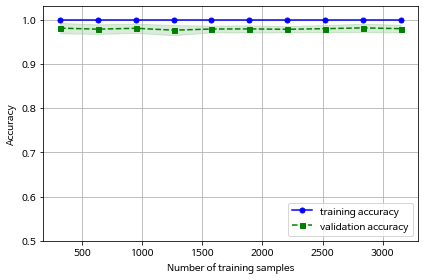

In [38]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_tree, # 수정
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)
 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
 
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
 
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
 
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
 
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
 
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])  # 수정
plt.tight_layout()
plt.show()
 


#### 7.4 하이퍼 파라미터 튜닝
- 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝
- 기계학습 모델의 성능을 결정하는 하이퍼 파라미터 튜닝

In [39]:
param_range1 = [1,2,3,4,5,6,7,8,9,10] # 수정
param_range2 = [10,20,30,40,50] # 수정
 
param_grid = [{'decisiontreeclassifier__max_depth': param_range1, # 수정
 'decisiontreeclassifier__min_samples_leaf': param_range2}] # 수정
 
gs = GridSearchCV(estimator=pipe_tree, # 수정
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
 
gs = gs.fit(X_train, y_train)
 
print(gs.best_score_)
print(gs.best_params_)

0.9851428571428571
{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 10}


### 8. 최적화 모델 검정
- 최적모델을 이용해 검정 데이터(full data)최종 확인
- best_tree로 모델명 변경

In [40]:
best_tree = gs.best_estimator_
best_tree.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10))])

- 검증용 데이터로 예측

In [41]:
y_pred = best_tree.predict(X_test)

- 정오 분류표 검정

In [44]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                       index=['True[0]', 'True[1]'],
                       columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],1346,10
True[1],19,125


In [45]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.87      0.90       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500

